In [1]:
import rasterio
import numpy as np
from lang_sam import LangSAM
from PIL import Image
from loguru import logger

fp = "Connecticut_20230706_01.tif"
dataset = rasterio.open(fp)
data = dataset.read()

img = np.transpose(data, (1,2,0))[:,:,:3]


im1 = img[:3500, :3400]
im2 = img[3500:7000, 3400:6800]
im3 = img[7000:10500, 6800:10200]
im4 = img[10500:, 10200:]

text_prompt = "water"
image_pil = Image.fromarray(np.uint8(im4))


im_small = image_pil.resize((300,300))
# im_small.size


/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

logger.debug("Loading model")
model = LangSAM()


2024-01-17 16:00:10.347 | DEBUG    | __main__:<module>:1 - Loading model
/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402379298/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/rdaroya_umass_edu/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


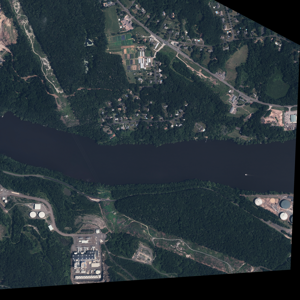

In [4]:
im_small

In [3]:

logger.debug("Getting masks")
masks, boxes, phrases, logits = model.predict(im_small, text_prompt)
print(masks)
print(len(masks))

2024-01-17 16:00:38.583 | DEBUG    | __main__:<module>:1 - Getting masks
/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/rdaroya_umass_edu/miniconda3/envs/lsa/lib/python3.8/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


OutOfMemoryError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 10.91 GiB total capacity; 5.48 GiB already allocated; 976.12 MiB free; 5.61 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
masks.shape